In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import interpolate
import os
from cv2 import cv2

from spline_fit import *

In [6]:
def calc_curvature(filename, xmin=0, xmax=-1, ymin=0, ymax=0.1):
    maxcurvs, meancurvs = fit("../data/midpoints/midpoints_"+filename+".csv", display=False)
    
    fig = plt.figure(figsize=(10,5))
    ax1 = fig.add_subplot(111)
#     maxcurvs = [x if x < 0.1 else None for x in maxcurvs]
#     meancurvs = [x if x < 0.1 else None for x in meancurvs]
    ln1 = ax1.plot(maxcurvs, 'r', label='Max Abs Curv')
    ax1.tick_params(axis='y', labelcolor='r')
    ax2 = ax1.twinx()
    ln2 = ax2.plot(meancurvs, 'b', label='Avg Abs Curv')
    ax2.tick_params(axis='y', labelcolor='b')

    lns = ln1 + ln2
    labs = [l.get_label() for l in lns]
    ax1.legend(lns, labs)
    
    ax1.set_xlim(xmin, xmax if xmax != -1 else len(maxcurvs))
    ax2.set_xlim(xmin, xmax if xmax != -1 else len(maxcurvs))
    ax1.set_ylim(ymin, ymax)
    ax2.set_ylim(ymin, ymax)

    # plt.plot(0.0001*length)

    plt.show()

    # Save the curvatures
    FILE = "../data/curvatures/maxcurv_" + filename + ".csv"
    df = pd.DataFrame(maxcurvs)
    df.to_csv(FILE, index=False)

    FILE = "../data/curvatures/meancurv_" + filename + ".csv"
    df = pd.DataFrame(meancurvs)
    df.to_csv(FILE, index=False)

100%|█████████████████████████████████████████████████████████████████████████████| 2501/2501 [00:21<00:00, 115.55it/s]


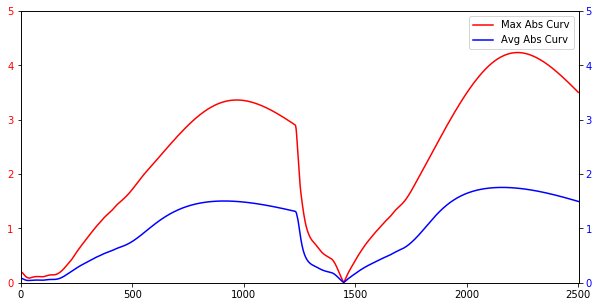

In [7]:
calc_curvature('658838_c4n3', xmin=0, xmax=-1, ymin=0, ymax=5)

100%|█████████████████████████████████████████████████████████████████████████████| 2501/2501 [00:20<00:00, 122.55it/s]


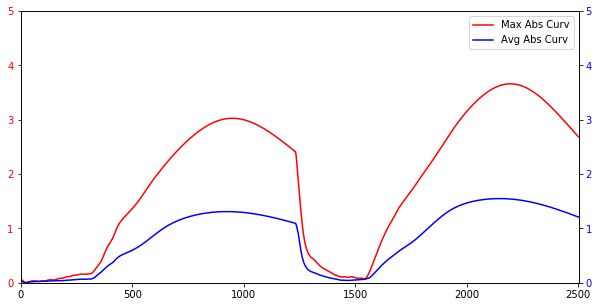

In [9]:
calc_curvature('351524', xmin=0, xmax=-1, ymin=0, ymax=5)

100%|██████████| 7200/7200 [00:59<00:00, 121.73it/s]


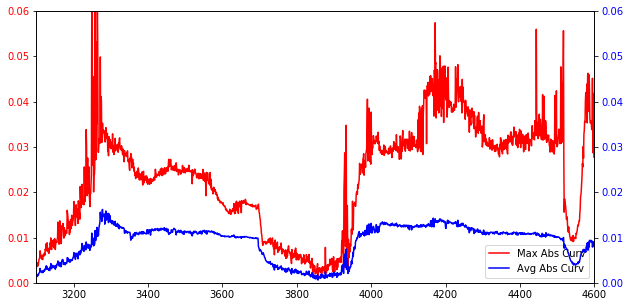

In [109]:
calc_curvature('Pre_Bisect_40x_4fps_ex3', xmin=3100, xmax=4600, ymin=0, ymax=0.06)

100%|██████████| 7200/7200 [00:59<00:00, 121.25it/s]


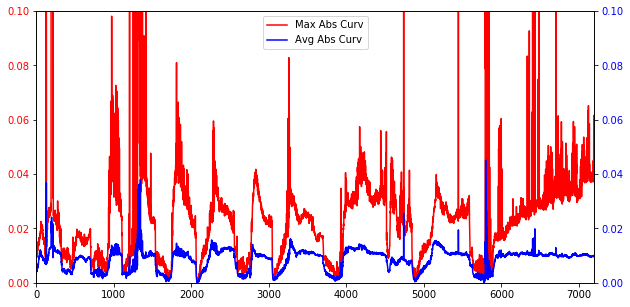

In [108]:
calc_curvature('Pre_Bisect_40x_4fps_ex3')

100%|██████████| 7496/7496 [01:02<00:00, 120.02it/s]


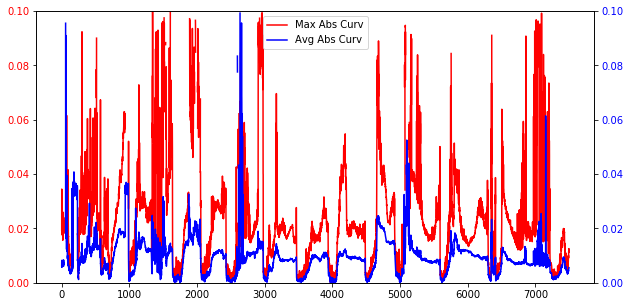

In [84]:
calc_curvature('Pre_Bisect_40x_4fps_ex4')

100%|██████████| 7489/7489 [01:01<00:00, 122.19it/s]


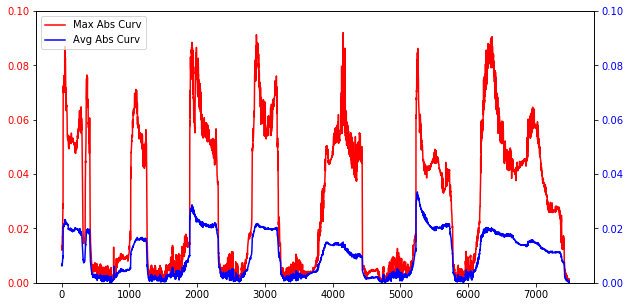

In [86]:
calc_curvature('Control-EGCaMP_exp1_a1_30x10fps_5%')

In [65]:
def save_video(outname):
    "Count the number of frames"

    # Directory name
    DIR = './results/'+ outname +'/frames/'

    # Number of frames
    nframes = len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))])

    # Frame size
    frame_size = cv2.imread(DIR + 'img0.jpg').shape
    nx, ny = frame_size[0], frame_size[1]

    # Convert the frames into video
    fourcc = cv2.VideoWriter_fourcc(*'MJPG')
    videoWriter = cv2.VideoWriter('./results/' + outname + '/splines/movie.avi', fourcc, 250, (ny, nx))

    for iframe in tqdm(range(nframes)):
        frame = cv2.imread(DIR + 'img' + str(iframe) + '.jpg')
        frame = cv2.resize(frame, (ny, nx))
        videoWriter.write(frame)
    videoWriter.release()
    cv2.destroyAllWindows()

In [33]:
save_video(FILENAME)

100%|██████████████████████████████████████████████████████████████████████████████| 7489/7489 [02:42<00:00, 46.07it/s]
